## EM algorithm for 1D Gaussian mixture model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def sample(n):
    return np.random.randn(n) + (np.random.rand(n) < 0.7) * 4 - 2

def eta(x):
    hoge = np.array([w[0] * norm.pdf(x, mu[0], sig[0]), w[1] * norm.pdf(x, mu[1], sig[1])])
    return hoge / hoge.sum(axis=0)

def update(x):
    global w, mu, sig
    e = eta(x)
    w = e.mean(axis=1)
    sig = np.sqrt((e * np.array([x-mu[0] ,x-mu[1]]) ** 2).sum(axis=1) / e.sum(axis=1))
    mu = (e * x).sum(axis=1) / e.sum(axis=1)
    
def plot(label=""):
    x = np.arange(-5,5,0.01)
    y = w[0] * norm.pdf(x, mu[0], sig[0]) + w[1] * norm.pdf(x, mu[1], sig[1])
    plt.plot(x,y, label=label)
    
def ans():
    x = np.arange(-5,5,0.01)
    y = 0.7 * norm.pdf(x, 2, 1) + 0.3 * norm.pdf(x, -2, 1)
    plt.plot(x,y, label='ans', color='black')

w [0.69330292 0.30669708]
mu [ 2.07905587 -2.04736747]
sigma [0.97303543 1.05218715]


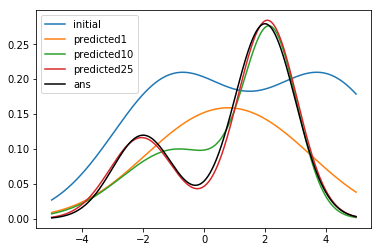

In [2]:
w = np.array([1,1])
mu = np.array([4,-1])
sig = np.array([2,2])


plot('initial')
    
for i in range(25):
    update(sample(1000))
    if i is 0 or i is 9 or i is 24:
        plot('predicted' + str(i+1))
    
print('w', w)
print('mu', mu)
print('sigma', sig)

ans()
plt.legend()
plt.savefig('em.png')